In [87]:
"""
This project demonstrates supervised image classification on the popular CIFAR-10 dataset using two distinct 
neural network architectures: a standard Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN). 
The objective is to analyze the effectiveness of each approach and showcase the clear advantages of CNNs in 
handling image data.

"""

'\nThis project demonstrates supervised image classification on the popular CIFAR-10 dataset using two distinct \nneural network architectures: a standard Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN). \nThe objective is to analyze the effectiveness of each approach and showcase the clear advantages of CNNs in \nhandling image data.\n\n'

In [55]:
# Importing Libraries 

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Loading the CIFAR-10 dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

# Checking the shape of training data
X_train.shape

(50000, 32, 32, 3)

In [57]:
# Checking the shape of test data   
X_test.shape

(10000, 32, 32, 3)

In [58]:
# Checking the shape of training data
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [59]:
# Y_train contains two-dimensional array. We will convert it to one-dimensional array
y_train = y_train.reshape(-1,)

# Checking the shape of training data after reshaping
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [60]:
# Similarly for y_test we will convert it to one-dimensional array 
y_test = y_test.reshape(-1,)

# Checking the shape of test data after reshaping
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [61]:
# Label names for CIFAR-10 dataset

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [67]:
# Dataset Visualization

def plot_sample(X, y, index):
    plt.figure(figsize=(3,3))
    plt.imshow(X[index])
    plt.axis('on')
    plt.xlabel(classes[y[index]])
    plt.show()

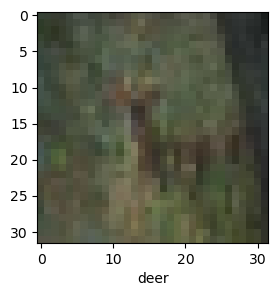

In [68]:
# Plotting some classes
plot_sample(X_train, y_train, 10)

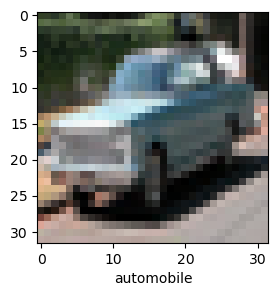

In [69]:
# Plotting some other classes
plot_sample(X_train, y_train, 32)

In [70]:
# Normalize the images to values between 0 and 1. As there are 255 values for each pixel in the image
# We will divide each pixel value by 255 to get values between 0 and 1 

X_train = X_train / 255.0
X_test = X_test / 255.0 

In [71]:
# Approach 1: Building a Simple ANN Model
# Simple Artificial Neural Network (ANN) Model for Image Classification 

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3050 - loss: 1.9322
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4181 - loss: 1.6454
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4518 - loss: 1.5559
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4735 - loss: 1.4912
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4957 - loss: 1.4332
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5136 - loss: 1.3808
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5262 - loss: 1.3507
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5398 - loss: 1.3168
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5522 - loss: 1.2784
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5604 - loss: 1.2501


In [73]:
# Evaluating and Predicting the ANN model

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.60      1000
           1       0.72      0.56      0.63      1000
           2       0.45      0.40      0.42      1000
           3       0.43      0.25      0.32      1000
           4       0.48      0.41      0.45      1000
           5       0.43      0.46      0.44      1000
           6       0.52      0.65      0.58      1000
           7       0.44      0.75      0.56      1000
           8       0.75      0.52      0.61      1000
           9       0.57      0.63      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.52     10000
weighted avg       0.54      0.53      0.52     10000



In [74]:
# The accuracy is quite low around 56% as ANN is not very efficient for image data.
# Hence we will build a Convolutional Neural Network (CNN) model for better accuracy.

In [75]:
# Approach 2: Using Convolutional Neural Network (CNN)

# Now we use Convolutional Neural Network for image classification

# Building the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Coding_software\Anaconda\envs\mlenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
# Compiling the CNN model

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
# Training the CNN model
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3932 - loss: 1.6595
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6069 - loss: 1.1242
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6665 - loss: 0.9574
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7048 - loss: 0.8556
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7269 - loss: 0.7814
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7521 - loss: 0.7142
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7726 - loss: 0.6597
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7881 - loss: 0.6069
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8047 - loss: 0.5570
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8165 - loss: 0.5196


In [79]:
# Evaluating the model

cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6967 - loss: 0.9665


[0.9721708297729492, 0.6963000297546387]

In [80]:
# Making predictions with CNN model

y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.16300453e-05, 6.96956977e-06, 1.31965906e-03, 9.76952076e-01,
        5.57387248e-05, 5.53724682e-03, 1.57155730e-02, 3.27888438e-06,
        3.26374487e-04, 1.43160969e-06],
       [3.64718512e-02, 1.42342085e-02, 3.68064866e-06, 1.15408363e-06,
        2.10759922e-07, 1.96927886e-06, 5.14651433e-08, 2.57572008e-09,
        9.48857248e-01, 4.29682375e-04],
       [5.73522411e-02, 1.57137722e-01, 6.06669625e-03, 1.72643811e-02,
        1.41220412e-03, 1.11763291e-02, 3.46162647e-04, 2.78652217e-02,
        3.43600661e-01, 3.77778411e-01],
       [7.03036964e-01, 8.57294290e-05, 9.41429567e-03, 6.15225217e-05,
        2.15159031e-03, 7.83565326e-07, 1.42287536e-04, 2.83537029e-05,
        2.84789562e-01, 2.88888754e-04],
       [9.66870175e-08, 4.38688994e-06, 4.07839799e-03, 6.76736562e-03,
        7.11598635e-01, 1.42342993e-03, 2.76119053e-01, 6.46037506e-06,
        5.60421938e-07, 1.58166927e-06]], dtype=float32)

In [81]:
# Converting predictions to class labels

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 4]

In [82]:
# Actual labels
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

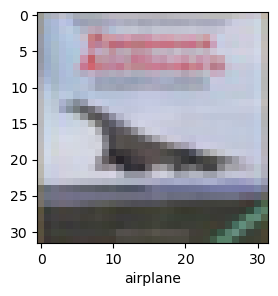

In [83]:
# Plotting some test images with their predicted labels
plot_sample(X_test, y_test,3)

In [84]:
# Plotting some classes
classes[y_classes[5]]

'frog'

In [85]:
classes[y_classes[1]]

'ship'

In [86]:
# Conclusion 
# With CNN, at the end 10 epochs, accuracy was at around 81% which is a significant improvement over ANN. 
# CNN's are best for image classification and gives greater accuracy. 
# Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions 
# while still preserving the features.